### 📘 Financial Analysis Portfolio

**Author:** Rui Carvalho Caseiro     
**LinkedIn:** [https://www.linkedin.com/in/ruicarvalhocaseiro/](https://www.linkedin.com/in/ruicarvalhocaseiro/)  
**GitHub:** [https://github.com/notp1ssed](https://github.com/notp1ssed)  
**Email:** ruicarvalhocaseiro@outlook.pt

*Exploring financial data, building models, and testing strategies through Python and data science.*

# Imports

In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import pandas_datareader.data as web
import ffn

from MyCustomLibrary.atw import timer, train_test_split

from matplotlib import pyplot
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

## Data

In [2]:
btc = pd.read_csv(
    r'D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\000_Local_Pyhton_Packages\MyDataLibrary\bitcoin_full.csv',
    index_col=0, parse_dates=[0])['Close']
btc

Date
2010-07-17       0.05
2010-07-18       0.09
2010-07-19       0.08
2010-07-20       0.07
2010-07-21       0.08
               ...   
2025-04-04   83843.80
2025-04-05   83504.80
2025-04-06   78214.48
2025-04-07   79235.34
2025-04-08   76271.95
Name: Close, Length: 5374, dtype: float64

In [3]:
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
idx_data = web.DataReader(idx_tickers, 'fred')
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2020-04-16,2799.55,23537.68,40.11
2020-04-17,2874.56,24242.49,38.15
2020-04-20,2823.16,23650.44,43.83
2020-04-21,2736.56,23018.88,45.41
2020-04-22,2799.31,23475.82,41.98
...,...,...,...
2025-04-08,4982.77,37645.59,52.33
2025-04-09,5456.90,40608.45,33.62
2025-04-10,5268.05,39593.66,40.72


In [8]:
# y = BTC n day future returns
# X = other assets n day returns

n = 5

dataset = pd.DataFrame()
dataset['BTC_5d_target']= np.log(btc/btc.shift(n)).shift(-n)

x1 = np.log(idx_data/idx_data.shift(n))
x2 = pd.concat([np.log(btc/btc.shift(n)) for n in [n, n*3, n*6, n*12]], axis=1).dropna()
x2.columns = ['ROC_1d', 'ROC_3d', 'ROC_6d', 'ROC_12d']

dataset = pd.concat([dataset, x1, x2], axis=1)
dataset.dropna(inplace=True)
dataset

,BTC_5d_target,SP500,DJIA,VIXCLS,ROC_1d,ROC_3d,ROC_6d,ROC_12d
2020-04-23,0.05,-0.00,-0.00,0.03,0.02,0.01,0.10,-0.29
2020-04-24,0.15,-0.01,-0.02,-0.06,0.05,0.03,0.12,-0.25
2020-04-27,0.14,0.02,0.02,-0.28,0.09,0.11,0.22,-0.12
2020-04-28,0.13,0.05,0.05,-0.30,0.05,0.13,0.28,-0.11
2020-04-29,0.01,0.05,0.05,-0.30,0.15,0.25,0.31,0.02
...,...,...,...,...,...,...,...,...
2025-03-28,-0.02,-0.02,-0.01,0.12,-0.02,0.04,0.00,-0.19
2025-03-31,0.01,-0.03,-0.01,0.24,-0.05,-0.00,-0.04,-0.24
2025-04-01,-0.09,-0.03,-0.01,0.24,-0.02,0.01,-0.10,-0.18
2025-04-02,-0.04,-0.01,-0.01,0.16,-0.02,-0.00,-0.04,-0.20


In [9]:
dataset.shape

(1201, 8)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1201 entries, 2020-04-23 to 2025-04-03
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BTC_5d_target  1201 non-null   float64
 1   SP500          1201 non-null   float64
 2   DJIA           1201 non-null   float64
 3   VIXCLS         1201 non-null   float64
 4   ROC_1d         1201 non-null   float64
 5   ROC_3d         1201 non-null   float64
 6   ROC_6d         1201 non-null   float64
 7   ROC_12d        1201 non-null   float64
dtypes: float64(8)
memory usage: 84.4 KB


In [11]:
dataset.columns

Index(['BTC_5d_target', 'SP500', 'DJIA', 'VIXCLS', 'ROC_1d', 'ROC_3d',
       'ROC_6d', 'ROC_12d'],
      dtype='object')

#### Exploratory Data Analysis

In [12]:
dataset.describe()

,BTC_5d_target,SP500,DJIA,VIXCLS,ROC_1d,ROC_3d,ROC_6d,ROC_12d
count,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00
mean,0.01,0.00,0.00,-0.00,0.01,0.02,0.04,0.08
std,0.07,0.02,0.02,0.15,0.07,0.13,0.19,0.28
min,-0.30,-0.11,-0.09,-0.62,-0.33,-0.44,-0.55,-0.69
25%,-0.03,-0.01,-0.01,-0.08,-0.03,-0.05,-0.07,-0.10
50%,0.01,0.00,0.00,-0.01,0.01,0.01,0.03,0.07
75%,0.04,0.02,0.01,0.07,0.04,0.09,0.17,0.28
max,0.23,0.07,0.08,0.84,0.23,0.53,0.76,0.95


#### Visualization

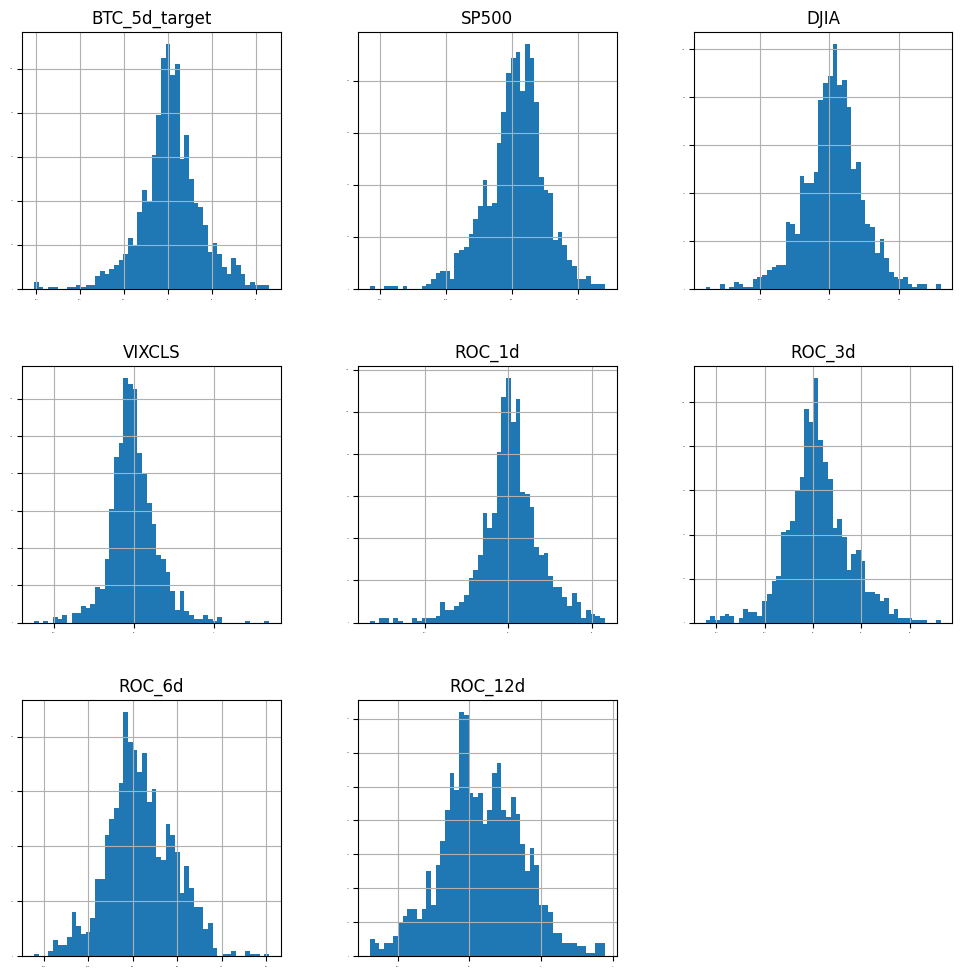

In [13]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

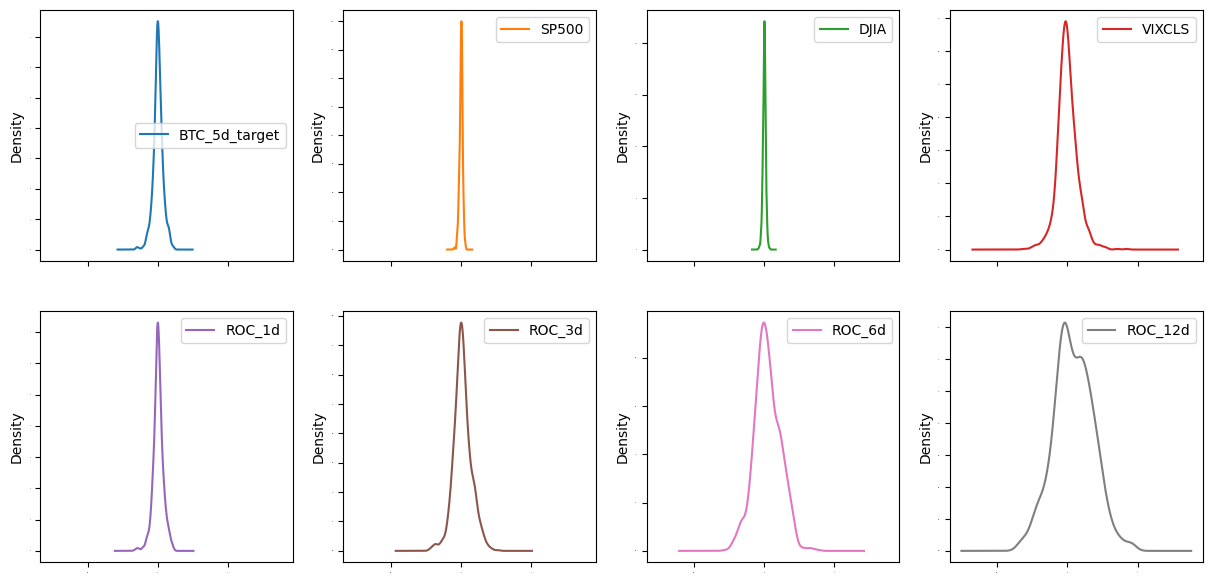

In [14]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

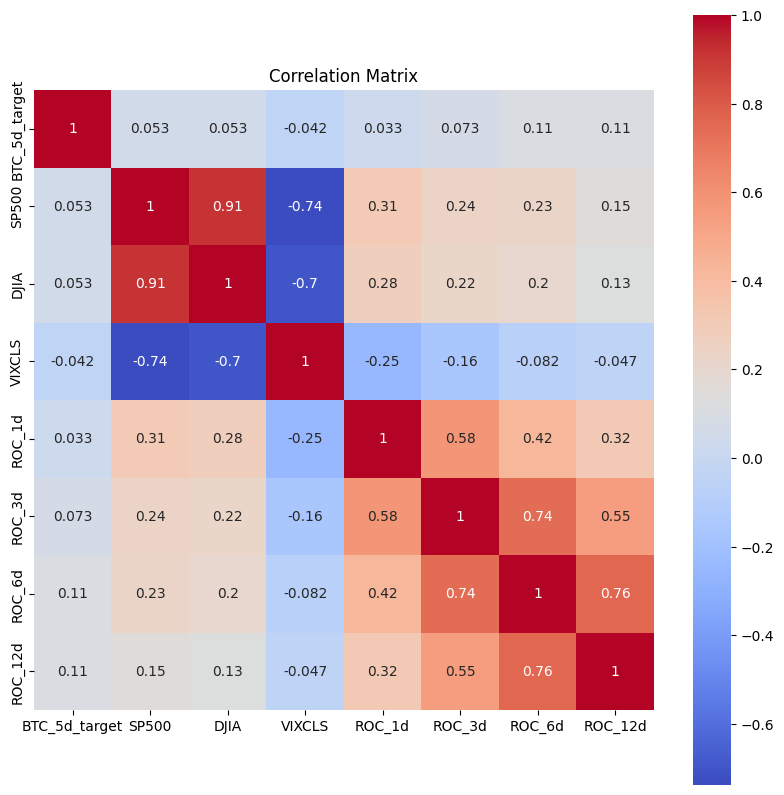

In [15]:
correlation = dataset.corr()
pyplot.figure(figsize=(10,10))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm');

<Figure size 1500x1500 with 0 Axes>

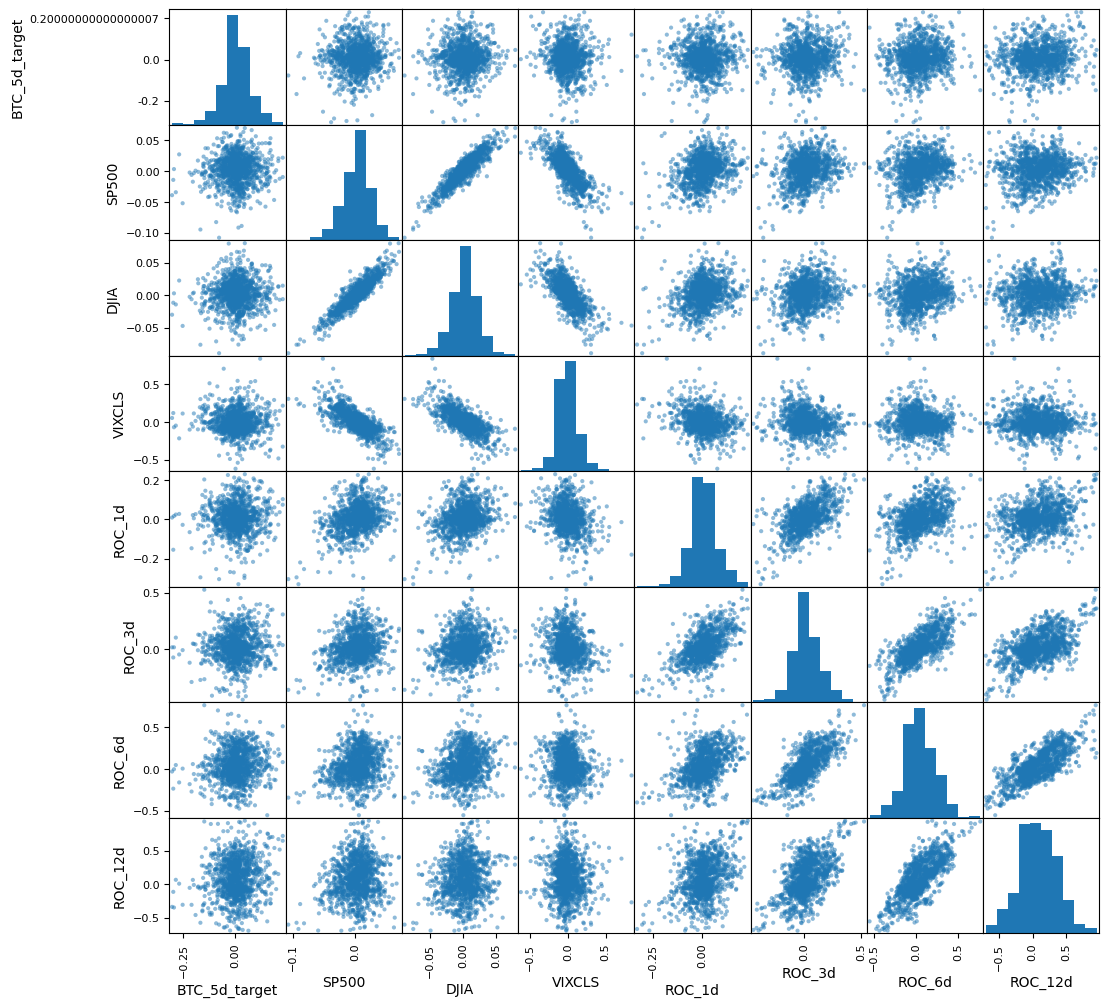

In [16]:
from pandas.plotting import scatter_matrix
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show();

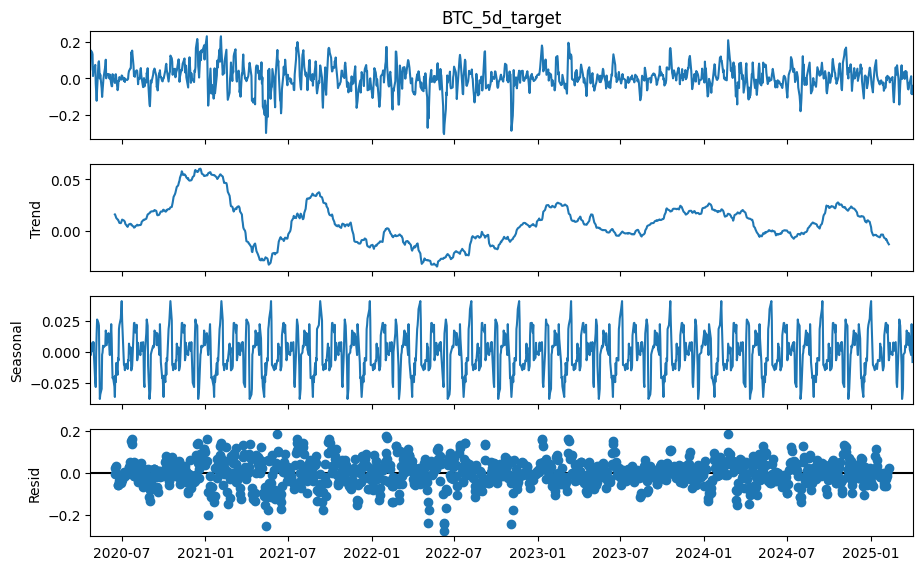

In [18]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(dataset['BTC_5d_target'],period=int(365/n))
fig = res.plot()
fig.set_figheight(6)
fig.set_figwidth(10)
pyplot.show();

#### Create Different sets of data

In [19]:
X = dataset.drop(columns=['BTC_5d_target'], axis=1)
y = dataset['BTC_5d_target']

## Feature Selection

Use sklearn's SelectKBest function to get a sense of feature importance.

In [20]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
ROC_12d,14.48
ROC_6d,13.86
ROC_3d,6.35
SP500,3.41
DJIA,3.38
VIXCLS,2.11
ROC_1d,1.33


In [21]:
remove_columns = ['ROC_1d', 'VIXCLS']
X.drop(columns=remove_columns, axis=1, inplace=True)

X_train, X_test = train_test_split(X)
y_train, y_test = train_test_split(y)

## Evaluate Algorithms and Models

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

models = []
# REGRESSION AND TREE REGRESSION ALGORITHMS
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# NEURAL NETWORK ALGORTHMS
models.append(('MLP', MLPRegressor()))

# ENSAMBLE MODELS
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

#### Loop over each ML model

In [23]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(res.predict(X_train), y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.005213 (0.002231) 0.005055 0.003302
LASSO: 0.005229 (0.002392) 0.005143 0.003286
EN: 0.005229 (0.002392) 0.005143 0.003286
KNN: 0.006801 (0.002799) 0.003098 0.004835
CART: 0.011809 (0.004128) 0.000000 0.009205
SVR: 0.006260 (0.002791) 0.004628 0.003420
MLP: 0.005308 (0.002187) 0.004958 0.003296
ABR: 0.005678 (0.002223) 0.004428 0.003440
GBR: 0.006072 (0.002574) 0.002814 0.003457
RFR: 0.006130 (0.002497) 0.000675 0.003560
ETR: 0.006462 (0.002739) 0.000000 0.003982


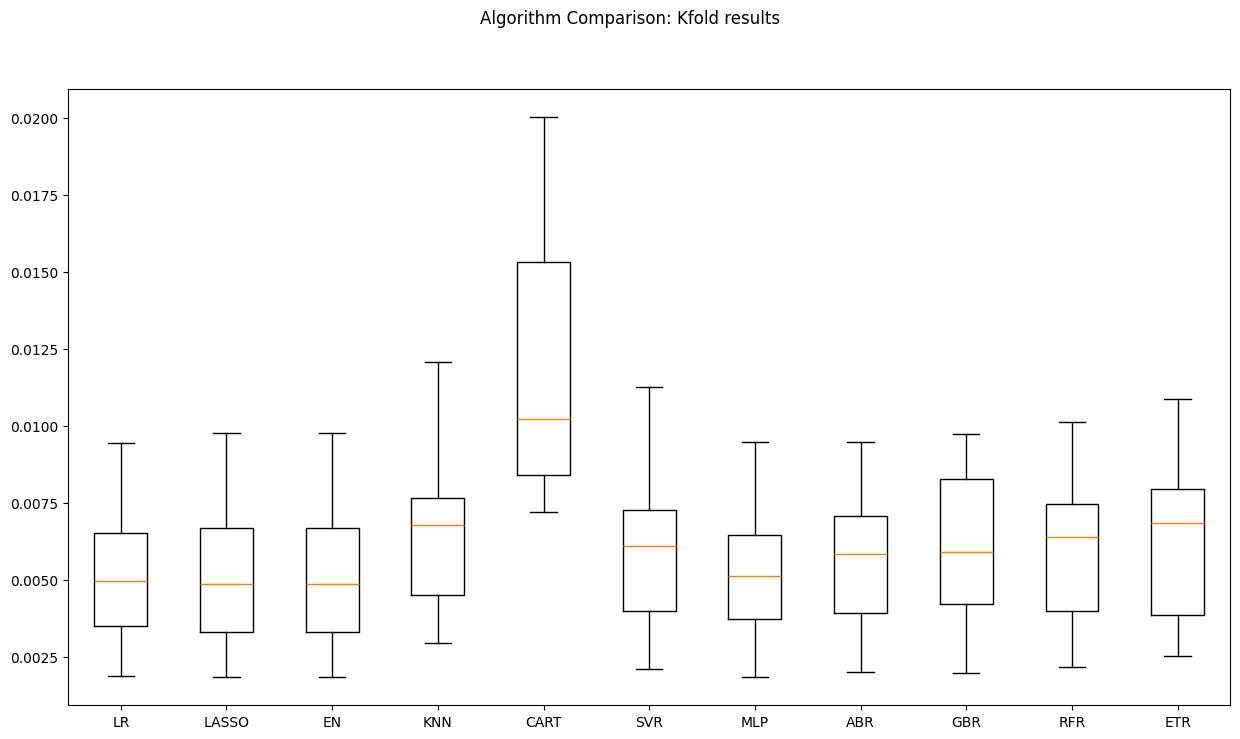

In [24]:
# K FOLD RESULTS

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

linear regression and the regularized regression including the Lasso regression (LASSO) and elastic net (EN) seem to do a good job.

#### Training and Test error

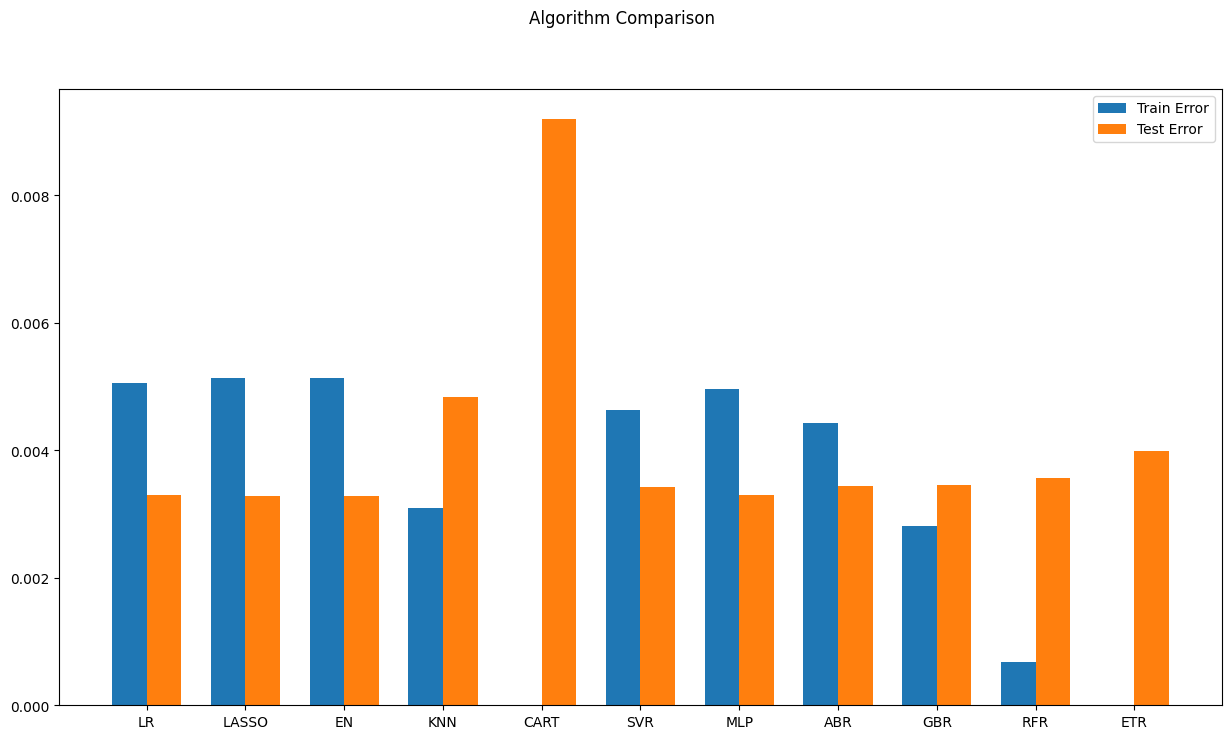

In [25]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

Looking at the training and test error, we still see a better performance of the linear models. Some of the algorithms, such as the decision tree regressor (CART) overfit on
the training data and produced very high error on the test set and these models
should be avoided. Ensemble models, such as gradient boosting regression (GBR) and
random forest regression (RFR) have low bias but high variance.

### Use the best ML algorithm to generate signals

In [43]:
# Initialize the class
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 0.04454778290363081
MSE: 0.003301780477587457
R2: -0.01632007053848672


In [44]:
y_pred

array([ 1.42779809e-02,  1.45118542e-02,  1.30988465e-02,  1.18742254e-02,
        1.36889131e-02,  8.59859103e-03,  6.17976744e-03,  4.89643945e-03,
        3.74525760e-03,  4.66823133e-03,  3.31374165e-03,  8.35766656e-03,
        9.44507796e-03,  8.23161358e-03,  8.60081033e-03,  1.02591257e-02,
        7.18764582e-03,  1.72766287e-03,  5.57060343e-05,  2.06184502e-03,
        2.39316525e-03,  3.35311660e-03,  4.02894114e-03,  3.20361567e-03,
        3.99705531e-03,  4.06698063e-04,  2.16610549e-03,  1.91566544e-03,
        7.71815056e-03,  5.60688013e-03,  7.38021185e-03,  9.74591931e-03,
        9.38174049e-03,  7.01002212e-03,  5.61909848e-03,  6.76366847e-03,
        6.61178525e-03,  5.75241807e-03,  6.34098646e-03,  6.17075729e-03,
        6.85566988e-03,  9.08134771e-03,  9.17633617e-03,  7.80589226e-03,
        8.36816134e-03,  8.57114368e-03,  9.40789623e-03,  8.99966919e-03,
        8.25464922e-03,  8.88516841e-03,  7.91652268e-03,  3.85208846e-03,
        2.79063050e-03, -

#### Backtest Signals

In [45]:
backtestdata = pd.DataFrame(index=X_test.index)

_, backtestdata['Market Returns'] = train_test_split(dataset['ROC_1d'])

backtestdata['signal_pred'] = np.sign(y_pred)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)

backtestdata.head()

,Market Returns,signal_pred,Strategy Returns
2024-04-04,-0.02,1.00,NaN
2024-04-08,0.08,1.00,0.08
2024-04-09,0.01,1.00,0.01
2024-04-10,0.04,1.00,0.04
2024-04-11,0.02,1.00,0.02


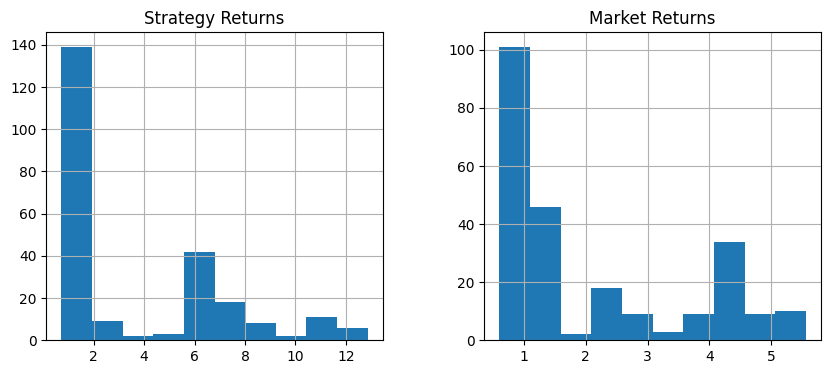

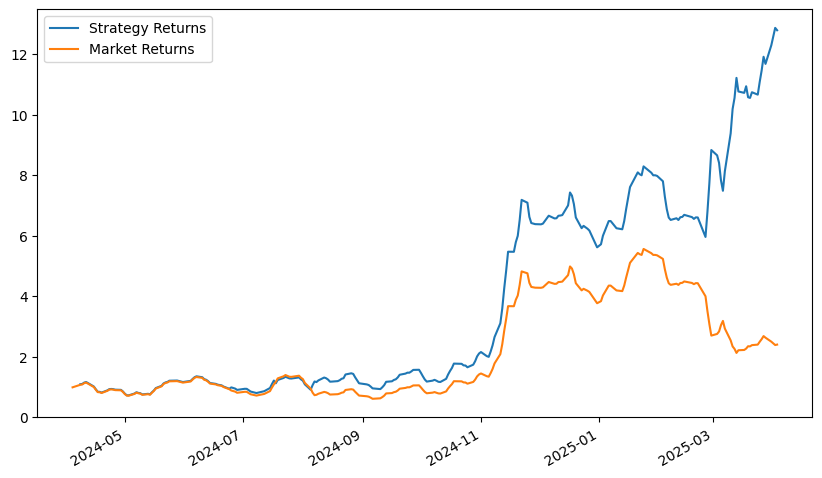

In [46]:
equity_curves = backtestdata[['Strategy Returns','Market Returns']].cumsum().apply(np.exp)

equity_curves.hist(figsize=(10,4))
equity_curves.plot(figsize=(10,6));

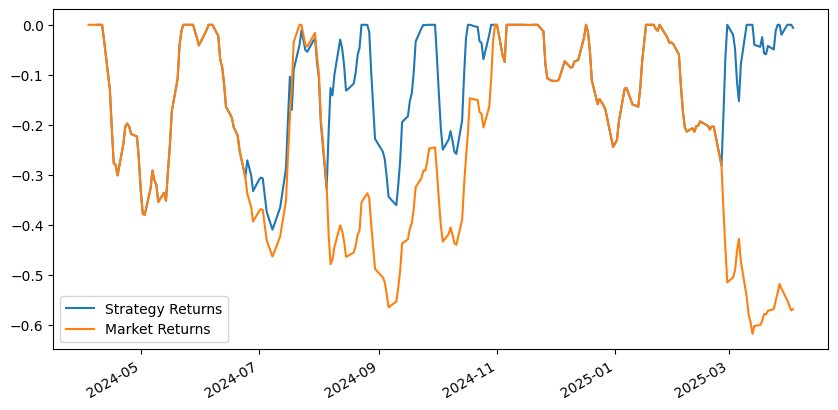

In [47]:
# what about the drawdowns?
ax = equity_curves.to_drawdown_series().plot(figsize=(10, 5))

In [48]:
# ok now what about some performance metrics?
stats = equity_curves.calc_stats()
stats.display()

Stat                 Strategy Returns    Market Returns
-------------------  ------------------  ----------------
Start                2024-04-08          2024-04-08
End                  2025-04-03          2025-04-03
Risk-free rate       0.00%               0.00%

Total Return         1078.43%            124.47%
Daily Sharpe         3.27                1.38
Daily Sortino        7.10                2.52
CAGR                 1121.59%            127.13%
Max Drawdown         -41.00%             -61.85%
Calmar Ratio         27.36               2.06

MTD                  4.04%               -3.88%
3m                   113.40%             -40.38%
6m                   930.90%             188.01%
YTD                  127.89%             -36.33%
1Y                   -                   -
3Y (ann.)            -                   -
5Y (ann.)            -                   -
10Y (ann.)           -                   -
Since Incep. (ann.)  1121.59%            127.13%

Daily Sharpe         3.27      

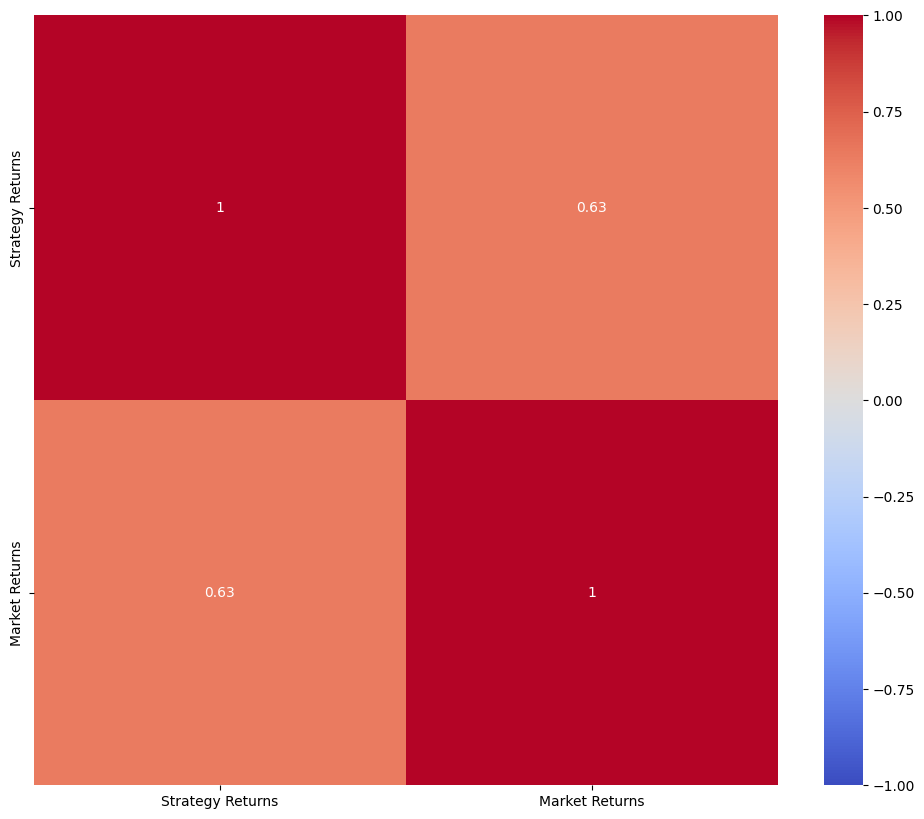

In [ ]:
from MyCustomLibrary.main import correlation_map

correlation_map(equity_curves)